In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/beauty.csv")

In [4]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [6]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [7]:
df.shape

(1260, 10)

In [8]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [11]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


<Axes: >

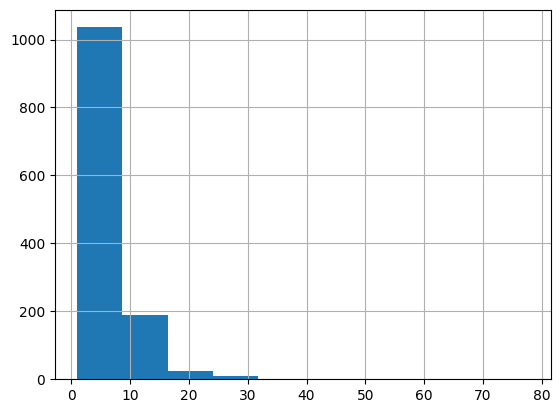

In [15]:
df['wage'].hist()

In [17]:
df['female'].value_counts()

female
0    824
1    436
Name: count, dtype: int64

In [18]:
toy_df = pd.DataFrame(
    {
    'age': [2, 30, 50],
    'salary': [60, 90, 120]
    }, 
    index=['Kate', 'Leo', 'Max'])

In [19]:
toy_df

,age,salary
Kate,2,60
Leo,30,90
Max,50,120


In [21]:
toy_df.loc[['Leo', 'Max'], 'age']

Leo    30
Max    50
Name: age, dtype: int64

#### Boolean Indexing

In [23]:
df[df['wage'] > 40]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [30]:
df[(df['wage'] > 10) & (df['female'] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


#### Apply

In [33]:
df['female'].apply(lambda gender_id: 'female' if gender_id == 1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

#### Map

In [35]:
df['female'].map({0: 'male', 1: 'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [37]:
for (gender_id, sub_dataframe) in df.groupby('female'):
    print("Median wages for {} are {}".format('men' if gender_id == 0
                                              else 'women', 
                                              sub_dataframe['wage'].median()))

Median wages for men are 6.41
Median wages for women are 3.75


In [38]:
df.groupby('female')['wage'].median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [39]:
df.groupby(['female', 'married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

#### Crosstab

In [40]:
pd.crosstab(df['female'], df['married'])

married,0,1
female,,
0,166,658
1,223,213


<Axes: xlabel='wage'>

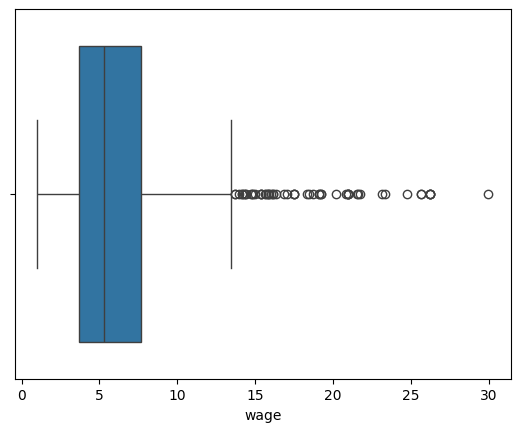

In [46]:
sns.boxplot(x='wage', data=df[df['wage'] < 30])

<Axes: xlabel='educ', ylabel='wage'>

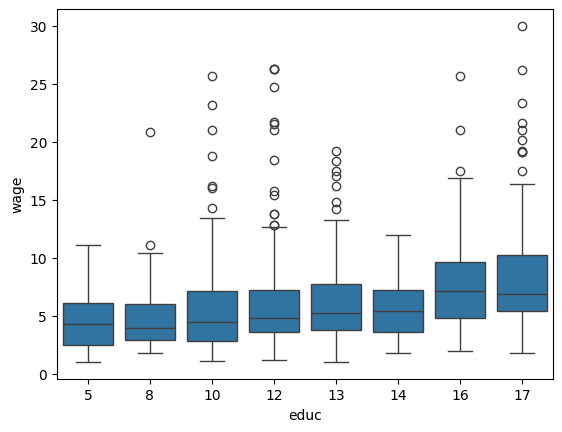

In [47]:
sns.boxplot(x='educ', y='wage', data=df[df['wage'] < 30])